In [8]:
import torch
import matplotlib.pyplot as plt
from modules1D_cls_free import Unet1D_cls_free, GaussianDiffusion1D_cls_free

In [9]:
def pot_signals(signals, labels):
    signals = signals.to('cpu').detach().numpy()
    fig, axs = plt.subplots(2, 5, figsize=(20,5))
    for i in range(2):
        for j in range(5):
            axs[i, j].plot(signals[i*5+j][0][:])
            axs[i, j].set_title(f'{labels[i*5+j]}')

In [11]:

n = 10
device = "cuda:3"
model = Unet1D_cls_free(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    num_classes = 5,
    cond_drop_prob = 0.5,
    channels = 1)
ckpt = torch.load("./checkpoint/DDPM1D_cls_free_MITBIH/checkpoint.pt")
model.load_state_dict(ckpt['model_state_dict'])
model = model.to(device)
diffusion = GaussianDiffusion1D_cls_free(
        model,
        seq_length = 128,
        timesteps = 1000).to(device)
y = torch.Tensor([0] * n).long().to(device)
x = diffusion.sample(classes = y, cond_scale = 3.)

sampling loop time step: 100%|██████████| 1000/1000 [00:37<00:00, 26.54it/s]


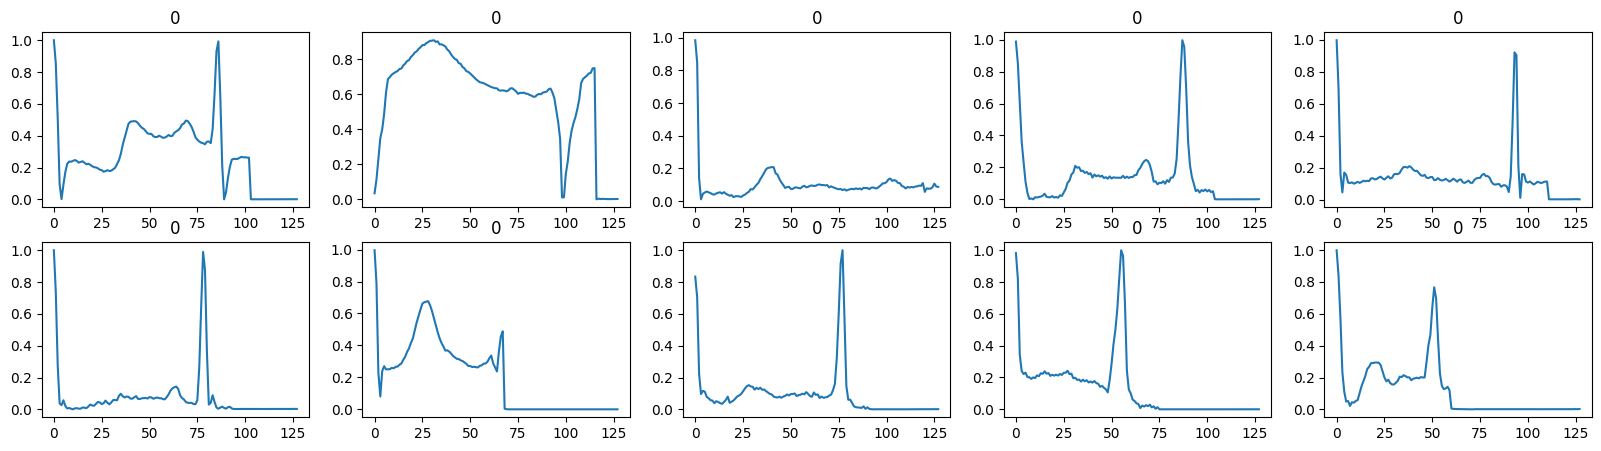

In [12]:
pot_signals(x, y)